In [102]:
import pandas as pd
import seaborn as sns
sns.set()
import re
df = pd.read_csv("ssh_results.csv", on_bad_lines="warn")
df.index = pd.to_datetime(df.timestamp)
df = df[df.index > "2023-11-20 00:00:00"].dropna()
df = df[~df.output.isin(["Error reading SSH protocol banner", "Authentication failed."]) & (~df.output.str.startswith(("Traceback (most recent call last):", "[Errno")))]
df

,IP,time,output,timestamp
timestamp,,,,
2023-11-20 14:54:17.668673,130.216.216.179,10.903934,2023-11-20 01:50:02.601413: I tensorflow/core/...,2023-11-20 14:54:17.668673
2023-11-20 14:54:17.668673,130.216.216.196,10.707516,2023-11-20 14:50:02.424213: I tensorflow/core/...,2023-11-20 14:54:17.668673
2023-11-20 14:54:17.668673,130.216.217.127,10.874046,2023-11-20 14:50:02.482229: I tensorflow/core/...,2023-11-20 14:54:17.668673
2023-11-20 14:54:17.668673,130.216.216.117,10.970752,2023-11-20 14:50:02.675896: I tensorflow/core/...,2023-11-20 14:54:17.668673
2023-11-20 14:54:17.668673,130.216.217.118,255.869681,2023-11-20 01:50:05.503027: I tensorflow/core/...,2023-11-20 14:54:17.668673
...,...,...,...,...
2023-11-20 14:58:16.329657,130.216.216.179,10.874047,2023-11-20 01:55:02.387035: I tensorflow/core/...,2023-11-20 14:58:16.329657
2023-11-20 14:58:16.329657,130.216.216.196,10.696721,2023-11-20 14:55:02.227004: I tensorflow/core/...,2023-11-20 14:58:16.329657
2023-11-20 14:58:16.329657,130.216.217.127,10.879497,2023-11-20 14:55:02.303481: I tensorflow/core/...,2023-11-20 14:58:16.329657


In [103]:
# Extract some metrics from the output
def parse_time_to_seconds(time_str):
    minutes, seconds = map(float, time_str.split('m'))
    return minutes * 60 + seconds
df["nvidia-smi_time"] = df.output.str.extract(r'real\s+(.+)s')[0].apply(parse_time_to_seconds)
df["tf_devices_time"] = df.output.str.extract(r'Took (\d+)s').astype(int)
df["serials"] = df.output.str.findall(r'Serial Number\s*:\s*([^:]+)\n').apply(lambda s: ", ".join(s))
df["product names"] = df.output.str.findall("^    Product Name\s*:\s*([^:]+)$", re.MULTILINE).apply(lambda s: ", ".join(s))
df["bitshift"] = (df["product names"] == "Unknown Error")
df["persistence"] = df.output.str.extract(r'Persistence Mode\s*:\s*(.+)\n')
df["tf_detected_GPUs"] = df.output.str.findall(r"physical_device:(GPU:\d)', device_type='GPU'").str.len()
df

,IP,time,output,timestamp,nvidia-smi_time,tf_devices_time,serials,product names,bitshift,persistence,tf_detected_GPUs
timestamp,,,,,,,,,,,
2023-11-20 14:54:17.668673,130.216.216.179,10.903934,2023-11-20 01:50:02.601413: I tensorflow/core/...,2023-11-20 14:54:17.668673,0.120,0,1322122007252,NVIDIA A100 80GB PCIe,False,Enabled,1
2023-11-20 14:54:17.668673,130.216.216.196,10.707516,2023-11-20 14:50:02.424213: I tensorflow/core/...,2023-11-20 14:54:17.668673,0.102,0,1652422032676,NVIDIA A100 80GB PCIe,False,Enabled,1
2023-11-20 14:54:17.668673,130.216.217.127,10.874046,2023-11-20 14:50:02.482229: I tensorflow/core/...,2023-11-20 14:54:17.668673,0.212,0,"1652422032681, 1322122007042","NVIDIA A100 80GB PCIe, NVIDIA A100 80GB PCIe",False,Enabled,2
2023-11-20 14:54:17.668673,130.216.216.117,10.970752,2023-11-20 14:50:02.675896: I tensorflow/core/...,2023-11-20 14:54:17.668673,0.267,0,"1323022014403, 1323022014449","NVIDIA A100 80GB PCIe, NVIDIA A100 80GB PCIe",False,Enabled,2
2023-11-20 14:54:17.668673,130.216.217.118,255.869681,2023-11-20 01:50:05.503027: I tensorflow/core/...,2023-11-20 14:54:17.668673,242.135,250,1323022015019,NVIDIA A100 80GB PCIe,False,Enabled,0
...,...,...,...,...,...,...,...,...,...,...,...
2023-11-20 14:58:16.329657,130.216.216.179,10.874047,2023-11-20 01:55:02.387035: I tensorflow/core/...,2023-11-20 14:58:16.329657,0.115,0,1322122007252,NVIDIA A100 80GB PCIe,False,Enabled,1
2023-11-20 14:58:16.329657,130.216.216.196,10.696721,2023-11-20 14:55:02.227004: I tensorflow/core/...,2023-11-20 14:58:16.329657,0.104,0,1652422032676,NVIDIA A100 80GB PCIe,False,Enabled,1
2023-11-20 14:58:16.329657,130.216.217.127,10.879497,2023-11-20 14:55:02.303481: I tensorflow/core/...,2023-11-20 14:58:16.329657,0.211,0,"1652422032681, 1322122007042","NVIDIA A100 80GB PCIe, NVIDIA A100 80GB PCIe",False,Enabled,2


In [104]:
df[df.serials == "1322822261453"]

,IP,time,output,timestamp,nvidia-smi_time,tf_devices_time,serials,product names,bitshift,persistence,tf_detected_GPUs
timestamp,,,,,,,,,,,
2023-11-20 11:08:16.139894,130.216.216.180,98.180928,2023-11-19 22:05:02.055763: I tensorflow/core/...,2023-11-20 11:08:16.139894,87.402,96,1322822261453,Unknown Error,True,Enabled,0
2023-11-20 11:13:17.055265,130.216.216.180,98.199521,2023-11-19 22:10:02.893190: I tensorflow/core/...,2023-11-20 11:13:17.055265,87.399,96,1322822261453,NVIDIA A100 80GB PCIe,False,Enabled,0
2023-11-20 11:18:17.218716,130.216.216.180,98.087677,2023-11-19 22:15:02.804695: I tensorflow/core/...,2023-11-20 11:18:17.218716,87.478,90,1322822261453,Unknown Error,True,Enabled,0
2023-11-20 11:23:17.144787,130.216.216.180,98.083398,2023-11-19 22:20:02.964595: I tensorflow/core/...,2023-11-20 11:23:17.144787,87.390,90,1322822261453,Unknown Error,True,Enabled,0
2023-11-20 11:28:16.774351,130.216.216.180,98.070997,2023-11-19 22:25:02.787771: I tensorflow/core/...,2023-11-20 11:28:16.774351,87.359,96,1322822261453,Unknown Error,True,Enabled,0
2023-11-20 11:33:16.536558,130.216.216.180,97.965514,2023-11-19 22:30:02.392724: I tensorflow/core/...,2023-11-20 11:33:16.536558,87.390,90,1322822261453,Unknown Error,True,Enabled,0
2023-11-20 11:38:16.235672,130.216.216.180,98.055712,2023-11-19 22:35:02.072113: I tensorflow/core/...,2023-11-20 11:38:16.235672,87.458,90,1322822261453,Unknown Error,True,Enabled,0
2023-11-20 11:43:17.342697,130.216.216.180,98.133203,2023-11-19 22:40:02.872451: I tensorflow/core/...,2023-11-20 11:43:17.342697,87.425,96,1322822261453,Unknown Error,True,Enabled,0
2023-11-20 11:48:16.469265,130.216.216.180,98.025745,2023-11-19 22:45:02.032234: I tensorflow/core/...,2023-11-20 11:48:16.469265,87.393,90,1322822261453,Unknown Error,True,Enabled,0


In [105]:
df[df.serials == "1322822261453"].bitshift.value_counts()

True     13
False     3
Name: bitshift, dtype: int64

In [106]:
df[df.serials == "1323022015019"].tf_detected_GPUs.value_counts()

0    46
Name: tf_detected_GPUs, dtype: int64

serials
1322122007252                   Axes(0.125,0.2;0.775x0.68)
1322822261453                   Axes(0.125,0.2;0.775x0.68)
1323022014403, 1323022014449    Axes(0.125,0.2;0.775x0.68)
1323022015019                   Axes(0.125,0.2;0.775x0.68)
1652422032676                   Axes(0.125,0.2;0.775x0.68)
1652422032681, 1322122007042    Axes(0.125,0.2;0.775x0.68)
Name: nvidia-smi_time, dtype: object

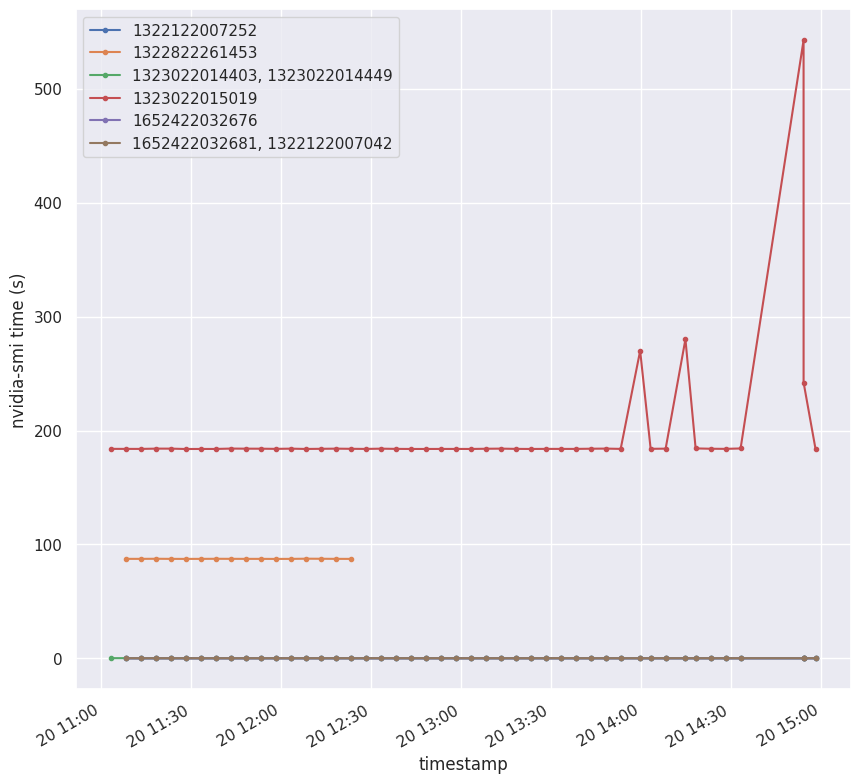

In [107]:
df.groupby("serials")["nvidia-smi_time"].plot(legend=True, figsize=(10,10), style=".-", ylabel="nvidia-smi time (s)")

In [108]:
df.groupby("serials")["nvidia-smi_time"].describe()

,count,mean,std,min,25%,50%,75%,max
serials,,,,,,,,
1322122007252,45.0,0.118844,0.002662,0.112,0.11800,0.1190,0.12000,0.125
1322822261453,16.0,87.412125,0.051633,87.344,87.38575,87.3955,87.43325,87.538
"1323022014403, 1323022014449",46.0,0.269348,0.004095,0.262,0.26625,0.2690,0.27200,0.280
1323022015019,46.0,196.984239,55.935348,183.794,183.86775,183.9310,184.10125,542.522
1652422032676,45.0,0.103578,0.003683,0.096,0.10200,0.1030,0.10500,0.122
"1652422032681, 1322122007042",45.0,0.214378,0.010773,0.201,0.21000,0.2120,0.21300,0.272


In [109]:
df.to_excel("results.xlsx")